## Using Graphviz to Demonstrate MAGIC Mating

In [1]:
from graphviz import Digraph

In [2]:
dot = Digraph(comment="Founders 1 through 8")
founder_names = ["B73", "B97", "CML103", "CML228", 
                 "CML247", "CML277", "CML322", "CML333"]

In [3]:
for i, name in enumerate(founder_names):
    dot.node(str(i), name)

In [4]:
founders = [[0, 1], [2, 3], [4, 5], [6, 7]]

### F`1` Nodes

In [5]:
f_one = []
for mother, father in founders:
    f_one_offspring = str(founder_names[mother]) + '/' + str(founder_names[father])
    f_one.append(f_one_offspring)

In [6]:
f_one

['B73/B97', 'CML103/CML228', 'CML247/CML277', 'CML322/CML333']

In [7]:
ftwo_crosses = [[0, 1], [2, 3]]

In [8]:
f_two = []
for ftwo_mother, ftwo_father in ftwo_crosses:
    ftwo_os = '[' + str(f_one[ftwo_mother]) + ']' + '//' + '[' + str(f_one[ftwo_father]) + ']'
    f_two.append(ftwo_os)

In [9]:
f_two

['[B73/B97]//[CML103/CML228]', '[CML247/CML277]//[CML322/CML333]']

In [10]:
fthree_crosses = [[0, 1]]

In [11]:
for fthree_mother, fthree_father in fthree_crosses:
    fthree_os = str(f_two[fthree_mother]) + '///' + str(f_two[fthree_father])
    f_three = fthree_os

In [12]:
f_three

'[B73/B97]//[CML103/CML228]///[CML247/CML277]//[CML322/CML333]'

In [13]:
f_one_indices = list(range(9, 13))
f_two_indices = list(range(13, 15))
f_three_indices = 15

### Assign Offspring Nodes

In [14]:
for idx, name in zip(f_one_indices, f_one):
    dot.node(str(idx), name)

In [15]:
for idx, name in zip(f_two_indices, f_two):
    dot.node(str(idx), name)

In [25]:
f_three

'[B73/B97]//[CML103/CML228]///[CML247/CML277]//[CML322/CML333]'

In [26]:
dot.node(str(f_three_indices), f_three)

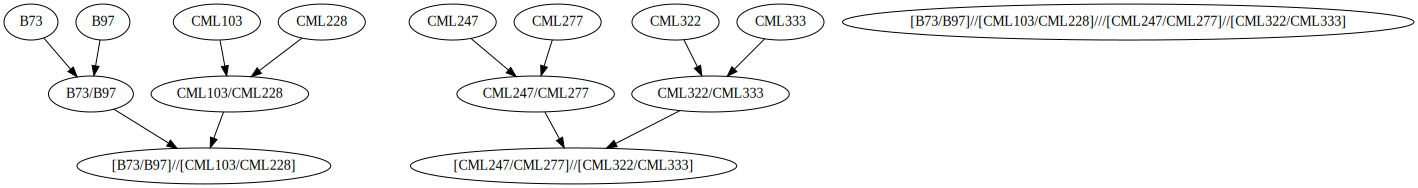

In [27]:
dot

## Edge Assignment

In [17]:
for idx, (mother, father) in enumerate(founders):
    dot.edge(str(mother), str(f_one_indices[idx]))
    dot.edge(str(father), str(f_one_indices[idx]))

In [18]:
fone_crosses = [f_one_indices[0:2:], f_one_indices[2::]]

In [19]:
for idx, (mother, father) in enumerate(fone_crosses):
    dot.edge(str(mother), str(f_two_indices[idx]))
    dot.edge(str(father), str(f_two_indices[idx]))

In [28]:
dot.edge('13', '15')
dot.edge('14', '15')

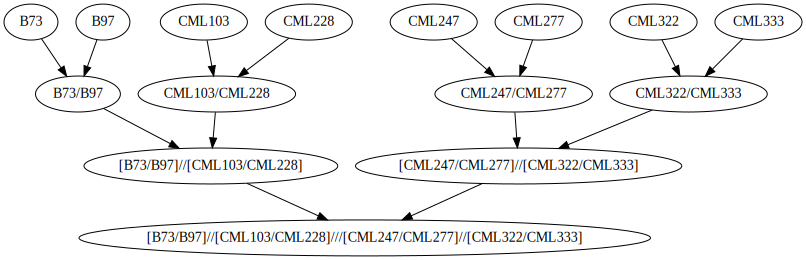

In [29]:
dot

In [31]:
dot.node_attr.update(color='lightblue2', style='filled')

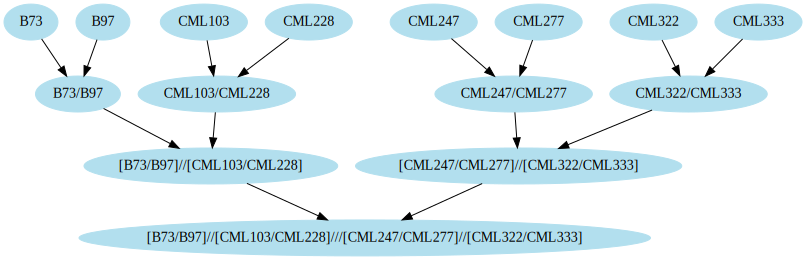

In [32]:
dot

In [33]:
dot.render("standard_magic_convergence")

'standard_magic_convergence.pdf'

In [36]:
dot.format = "tiff"

In [37]:
dot.render("reformed_graph")

'reformed_graph.tiff'